## DeepLearning : Mini-project
- 가위/바위/보 구분하기

### 01 데이터셋 확인하기
- LMS 환경 상에서 실습한 내용
- 웹캠 통해 데이터 생성하는 대신 주어진 데이터 활용

In [3]:
import tensorflow as tf
import numpy as np
import warnings

warnings.filterwarnings('ignore')

print(tf.__version__)
print(np.__version__)

2.19.0
1.22.4


In [11]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [15]:
# 하나만 불러와보기
temp_path = 'rock_scissor_paper/paper/0.jpg'
old_img = Image.open(temp_path)

In [18]:
old_img.size # 224 * 224의 이미지?

(224, 224)

##### (참고) R/G/B 각각 채널 분리하기
- 실제 이미지의 경우 R/G/B로 이루어져 있음

In [20]:
from PIL import Image
import numpy as np

# 이미지 열기
img = Image.open('rock_scissor_paper/paper/0.jpg')

# RGB 이미지로 변환 (혹시 모를 Grayscale 대비)
img = img.convert('RGB')

# numpy 배열로 변환 (shape: H x W x 3)
img_array = np.array(img)

# R, G, B 채널 분리
R = img_array[:, :, 0]  # Red 채널
G = img_array[:, :, 1]  # Green 채널
B = img_array[:, :, 2]  # Blue 채널

# 예시 출력
print(f"R shape: {R.shape}, G shape: {G.shape}, B shape: {B.shape}")
print(f"R channel sample:\n{R[:5, :5]}")

R shape: (224, 224), G shape: (224, 224), B shape: (224, 224)
R channel sample:
[[125 125 124 124 126]
 [124 124 125 125 127]
 [124 125 125 126 128]
 [125 126 126 129 129]
 [129 129 129 130 129]]


### 02 이미지 resize함수 정의 및 적용
- image크기 고정하기 위한 목적
- 28 by 28로 이미지 고정

In [21]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


##### 02-01 가위 이미지 resize

In [23]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


##### 02-02 바위 이미지 resize

In [24]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


##### 02-03 보 이미지 resize

In [25]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


##### 02-04 가위/바위/보 레이블링
- 가위:0 바위:1 보:2 로 레이블링하기

In [26]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


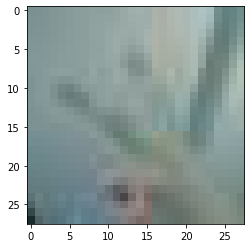

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 03 딥러닝-네트워크 설계

##### 03-01 모델 설계
- activation 함수 relu 함수 사용
- 마지막 activation은 softmax (output이 0, 1, 2 세 가지임에 유의)

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

# 예시 파라미터
n_channel_1=84 # 32에서 56으로 변경! -> 84
n_channel_2=56 # 32에서 28로 변경 -> 56
n_dense=32
n_train_epoch=15 # 10에서 12로 변경 -> 15

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation = 'relu', input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 84)     │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 84)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 56)     │        42,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        44,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,675 (350.29 KB)

 Trainable params: 89,675 (350.29 KB)

 Non-trainable params: 0 (0.00 B)

##### 03-02 model 학습시키기
- compile 후 model.fit을 할 것!

In [38]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3318 - loss: 28.0313
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3668 - loss: 5.0104
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3567 - loss: 1.4717
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3043 - loss: 1.2457
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3726 - loss: 1.1410
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4257 - loss: 1.0578
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4313 - loss: 1.1396
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4580 - loss: 1.0662
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5853 - loss: 0.9225
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5972 - loss: 0.8793
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6472 - loss: 0.8583
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy

### 04 모델 성능 테스트 하기

##### 04-01 test 데이터 resize
- 테스트 데이터도 resize 해야함(28*28 이미지)

In [32]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


##### 04-02 성능 체크!
- n_channel_1 = 32, n_channel_2 = 32, n_dense = 32, n_train_epoch = 10 : test_accuracy 0.2533
- n_channel_1 = 56, n_channel_2 = 28, n_dense = 32, n_train_epoch = 12 : test_accuracy 0.4533
- n_channel_1 = 84, n_channel_2 = 56, n_dense = 32, n_train_epoch = 15 : test_accuracy 0.3466

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 28ms/step - accuracy: 0.3467 - loss: 1.7330
test_loss: 1.7329508066177368 
test_accuracy: 0.3466666638851166


##### 04-03 해석
- 지금 딥러닝 아키텍처는 MLP에 해당함
- 이미지의 경우 CNN(convolutional neural network)이 성능이 월등한 것으로 알려져 있음
- 해당 문제를 CNN으로 풀면 더 나아질지 확인 필요